In [42]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random
from collections import defaultdict
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers, optimizers, backend, models
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from IPython.display import display
import argparse
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, Xception, MobileNetV2, \
EfficientNetB0, InceptionResNetV2
from tensorflow.keras import regularizers
import time
from PIL import Image
from matplotlib.gridspec import GridSpec

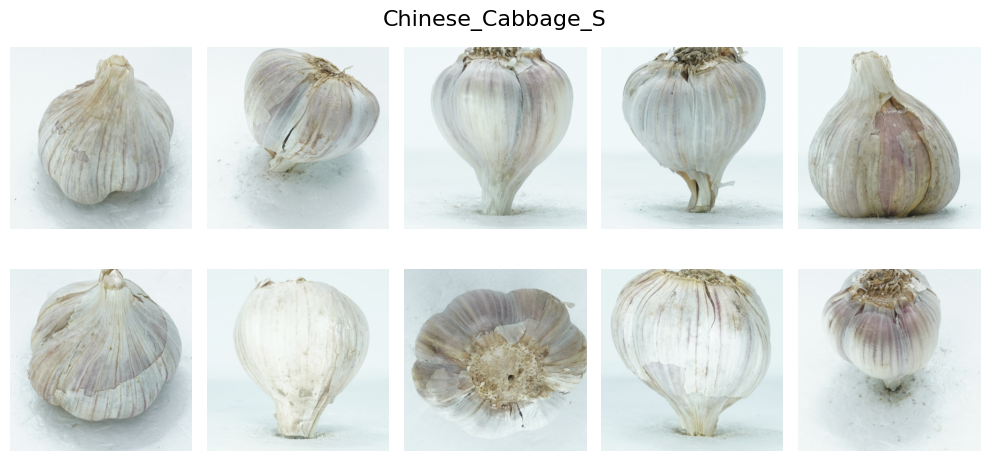

In [100]:
def show_samples(img_path):
    img_list = os.listdir(img_path)
    sample_paths = random.sample(img_list, 10)
    samples = [os.path.join(img_path, sample_path) for sample_path in sample_paths]

    fig = plt.figure(figsize = (10, 5 ))
    gs = GridSpec(2, 5, figure = fig)
    
    for i, img in enumerate(samples):
        image = Image.open(img)
        ax = fig.add_subplot(gs[i])
        ax.imshow(image)
        ax.axis('off')

    plt.tight_layout()
    plt.suptitle('Chinese_Cabbage_S', fontsize = 16)
    plt.show()

show_samples('/kaggle/input/validation-garlic/garlic_uiseong_S')

------------------------------------------------------------

In [58]:
from IPython.display import FileLink
import os

FileLink('/kaggle/working/sample.png')

/kaggle/working/sample.png

In [ ]:
patterns = [ "11_1TOP", "2_2FR45", "7_2FR45", "12_2FR45", "17_2FR45",
        "22_2FR45", "27_2FR45", "32_2FR45", "37_2FR45", "21_1TOP" ]

def select_imgs(img_path):
    selected_imgs_list = [img for img in img_path if any(pattern in img for pattern in patterns) ]
    return selected_imgs_list


data_path = '/kaggle/input/training-garlic'
data_path_2 = '/kaggle/input/validation-garlic'

img_path_s = os.path.join(data_path, 'garlic_uiseong_S')
img_path_m = os.path.join(data_path, 'garlic_uiseong_M')
img_path_l = os.path.join(data_path, 'garlic_uiseong_L')
img_path_2s = os.path.join(data_path_2, 'garlic_uiseong_S')
img_path_2m = os.path.join(data_path_2, 'garlic_uiseong_M')
img_path_2l = os.path.join(data_path_2, 'garlic_uiseong_L')

img_s =  os.listdir(img_path_s)
img_m =  os.listdir(img_path_m)
img_l =  os.listdir(img_path_l)
img_2s =  os.listdir(img_path_2s)
img_2m =  os.listdir(img_path_2m)
img_2l =  os.listdir(img_path_2l)

img_s_list = select_imgs(img_s)
img_m_list = select_imgs(img_m)
img_l_list = select_imgs(img_l)
img_2s_list = select_imgs(img_2s)
img_2m_list = select_imgs(img_2m)
img_2l_list = select_imgs(img_2l)

training_img_s =  [os.path.join(img_path_s, img) for img  in img_s_list]
training_img_m =  [os.path.join(img_path_m, img) for img  in img_m_list]
training_img_l =  [os.path.join(img_path_l, img) for img  in img_l_list]

test_img_s =  [os.path.join(img_path_2s, img) for img  in img_2s_list]
test_img_m =  [os.path.join(img_path_2m, img) for img  in img_2m_list]
test_img_l =  [os.path.join(img_path_2l, img) for img  in img_2l_list]


# persimmon_bansi_training : 1 ~ 58 (delete 59)
# persimmon_bansi_test : 77 ~ 84 (delete 76)


In [ ]:
training_persimmon_bansi_s = sorted(training_img_s, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_S_")[1].split("-")[0]),
                                    #int(x.split("bansi_S_")[1].split("-")[1].split("_")[0])
                                   ) )

training_persimmon_bansi_m = sorted(training_img_m, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_M_")[1].split("-")[0]),
                                    #int(x.split("bansi_M_")[1].split("-")[1].split("_")[0])
                                   ) )

training_persimmon_bansi_l = sorted(training_img_l, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_L_")[1].split("-")[0]),
                                   # int(x.split("bansi_L_")[1].split("-")[1].split("_")[0])
                                   ) )


test_persimmon_bansi_s = sorted(test_img_s, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_S_")[1].split("-")[0]),
                                   # int(x.split("bansi_S_")[1].split("-")[1].split("_")[0])
                                   ) )

test_persimmon_bansi_m = sorted(test_img_m, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_M_")[1].split("-")[0]),
                                   # int(x.split("bansi_M_")[1].split("-")[1].split("_")[0])
                                   ) )

test_persimmon_bansi_l = sorted(test_img_l, key = lambda x: ( \
                                    int(x.split("garlic_uiseong_L_")[1].split("-")[0]),
                                   # int(x.split("bansi_L_")[1].split("-")[1].split("_")[0])
                                   ) )

In [ ]:


images = []
labels = []
test_images = []
test_labels = []

def load_and_label(image_path, label):
    for image in image_path:
        img = load_img(image, target_size = (224, 224))
        img_array =img_to_array(img) / 225.0
        images.append(img_array)
        labels.append(label)


load_and_label(training_persimmon_bansi_s , 0)
load_and_label(training_persimmon_bansi_m, 1)
load_and_label(training_persimmon_bansi_l, 2)

def test_load_and_label(image_path, label):
    for image in image_path:
        img = load_img(image, target_size = (224, 224))
        img_array =img_to_array(img) / 225.0
        test_images.append(img_array)
        test_labels.append(label)

test_load_and_label(test_persimmon_bansi_s, 0)
test_load_and_label(test_persimmon_bansi_m, 1)
test_load_and_label(test_persimmon_bansi_l, 2)

images = np.array(images)
labels = np.array(labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
length_s = len(training_persimmon_bansi_s)
length_m = len(training_persimmon_bansi_m)
length_l = len(training_persimmon_bansi_l)


split_s = int(length_s * 0.8)
split_m = int(length_m * 0.8)
split_l = int(length_l * 0.8)


X_train_s = images[:split_s]
y_train_s = labels[:split_s]
X_train_m = images[length_s:length_s + split_m]
y_train_m = labels[length_s:length_s + split_m]
X_train_l = images[length_s + length_m:length_s + length_m + split_l]
y_train_l = labels[length_s + length_m:length_s + length_m + split_l]


X_train = np.concatenate([X_train_s, X_train_m, X_train_l], axis=0)
y_train = np.concatenate([y_train_s, y_train_m, y_train_l], axis=0)


X_val_s = images[split_s:length_s]
y_val_s = labels[split_s:length_s]
X_val_m = images[length_s + split_m:length_s + length_m]
y_val_m = labels[length_s + split_m:length_s + length_m]
X_val_l = images[length_s + length_m + split_l:]
y_val_l = labels[length_s + length_m + split_l:]


X_val = np.concatenate([X_val_s, X_val_m, X_val_l], axis=0)
y_val = np.concatenate([y_val_s, y_val_m, y_val_l], axis=0)


In [ ]:
train_datagen = ImageDataGenerator(
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size = 16)
val_generator = val_datagen.flow(X_val, y_val, batch_size = 16)
test_generator = test_datagen.flow(test_images, test_labels, batch_size = 16)

In [ ]:

backend.clear_session()

model_base =  InceptionResNetV2(weights = 'imagenet', include_top = False)

InceptionV3_model = model_base.output
pool = GlobalAveragePooling2D()(InceptionV3_model)
dense_1 = layers.Dense(256, activation = 'relu')(pool)
output = layers.Dense(3, activation = 'softmax')(dense_1)


model_InceptionV3 = Model(inputs = model_base.input, outputs = output)

model_InceptionV3.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = optimizers.SGD(momentum = 0.9, learning_rate = 1e-4),
                metrics = ['accuracy']
                        )

In [ ]:
from tensorflow.keras.layers import Conv2D, Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential


backend.clear_session()
model  =  Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(64, (3,3), activation = 'relu'),
    Conv2D(128,(3,3), activation = 'relu'),
    Conv2D(256, (3,3), activation = 'relu'),
    GlobalAveragePooling2D(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax')    
])



model.compile(loss = 'sparse_categorical_crossentropy', 
                optimizer = 'adam',
                metrics = ['accuracy']
                        )


In [ ]:
start_time = time.time()
history = model_InceptionV3.fit(
    train_generator, 
    epochs = 25,
    validation_data = val_generator,
    verbose = 1,
    callbacks = [EarlyStopping(monitor = 'val_accuracy', patience= 5, restore_best_weights = True, min_delta = 0.01)]
)

end_time = time.time()

elapsed_time = end_time - start_time

print(f'{elapsed_time:.2f}')

loss, accuracy= model_InceptionV3.evaluate(test_generator)
print(loss, accuracy)

In [ ]:
print(f'{elapsed_time:.2f}')

In [ ]:
model_InceptionV3.save('garlic_InceptionV3.h5')

In [ ]:
grouped_images = defaultdict(list)


test_img_paths = test_persimmon_bansi_s + test_persimmon_bansi_m + test_persimmon_bansi_l

for img_path in test_img_paths:
	fruit_id = img_path.split("garlic_uiseong_")[2].split('-')[0]
	grouped_images[fruit_id].append(img_path)


In [ ]:
predicted_label = defaultdict(list)

def predict_group(model, image_paths, fruit_id):
    preds = []
    
    for img_path in image_paths:
        img = load_img(img_path, target_size = (224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis = 0)
        
        pred = model.predict(img_array, verbose = 0)
        preds.append(np.argmax(pred))
        predicted_label[fruit_id].append(np.argmax(pred))
    
    final_class = max(set(preds), key=preds.count)
    
    return final_class


correct_cnt = 0
total_cnt = 0 


for fruit_id, img_paths in grouped_images.items():
    final_class = predict_group(model_InceptionV3, img_paths, fruit_id)
    
    if 'S' in fruit_id:
        true_class = 0
    elif 'M' in fruit_id:
        true_class = 1
    elif 'L' in fruit_id:
        true_class = 2
    else:
        print('error!')
    
    if true_class == final_class:
        correct_cnt += 1
        total_cnt += 1
    else: 
        total_cnt +=1

    

accuracy_score= correct_cnt/total_cnt

print(accuracy_score)

In [ ]:
predicted_label

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

fig, axes = plt.subplots(3,3, figsize = (10, 10))
axes = axes.flatten()

target_img_paths = grouped_images['M_160'][:9]


for i, img_path in enumerate(target_img_paths):

    img = load_img(img_path, target_size = (224, 224))
    axes[i].imshow(img)
    axes[i].axis('off')


plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------

In [ ]:
for fruit_id, img_paths in grouped_images.items():
    print(f"Fruit ID: {fruit_id}, Number of images: {len(img_paths)}")

In [ ]:
grouped_images['S_199']

In [ ]:
train_images_dict = defaultdict(list)

training = training_persimmon_bansi_s + training_persimmon_bansi_m + training_persimmon_bansi_l
for path in training:
    group_name =  path.split("garlic_uiseong_")[2].split('-')[0]
    train_images_dict[group_name].append(path)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate
from tensorflow.keras.models import Model
import cv2

In [ ]:
for group_name, img_paths in train_images_dict.items():
    if len(img_paths) != 10:
        print(group_name, len(img_paths))

remove = ['M_102', 'L_97']

for key in remove:
    if key in train_images_dict:
        del train_images_dict[key]

In [ ]:
def load_multi_view_images(image_paths, target_size=(112, 112)):
    views = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img_array = img / 255.0
        views.append(img_array)
    return np.array(views, dtype=np.float32)

all_views = []
labels = []

for group_name, img_paths in train_images_dict.items():
    if 'S' in group_name:
        label = 0
    elif 'M' in group_name:
        label = 1
    elif 'L' in group_name:
        label = 2
    else:
        print('error!')

    views = load_multi_view_images(img_paths)
    all_views.append(views)
    labels.append(label)

all_views = np.array(all_views, dtype=np.float32)
labels = np.array(labels)


X_train, X_val, y_train, y_val = train_test_split(all_views, labels, test_size=0.2, random_state=42)

In [ ]:
def build_mvcnn_model(input_shape, num_views, num_classes):
    inputs = [Input(shape=input_shape) for _ in range(num_views)]

    shared_cnn = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten()
    ])

    view_features = [shared_cnn(inp) for inp in inputs]
    

    merged = Concatenate()(view_features)
    x = Dense(256, activation='relu')(merged)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model


input_shape = (112, 112, 3)
num_views = X_train.shape[1] 
num_classes = 3

mvcnn_model = build_mvcnn_model(input_shape, num_views, num_classes)
mvcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


train_inputs = [X_train[:, i] for i in range(num_views)]
val_inputs = [X_val[:, i] for i in range(num_views)]

early_stopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.05,
    patience = 5,
    restore_best_weights = True
)

history = mvcnn_model.fit(train_inputs, y_train, validation_data=(val_inputs, y_val),\
                          epochs=20, batch_size=8, verbose=1, callbacks = [early_stopping])

In [ ]:
test_images_dict = grouped_images 

remove_list = ['M_154', 'L_150', 'S_127']

for key in remove_list:
    if key in test_images_dict:
        del test_images_dict[key]

In [ ]:

test_all_views = []
test_labels = []

for group_name, img_paths in test_images_dict.items():
    if 'S' in group_name:
        label = 0
    elif 'M' in group_name:
        label = 1
    elif 'L' in group_name:
        label = 2
    else:
        continue

    views = load_multi_view_images(img_paths)
    test_all_views.append(views)
    test_labels.append(label)

test_all_views = np.array(test_all_views, dtype=np.float32)
test_labels = np.array(test_labels)

num_views = test_all_views.shape[1]  
test_inputs = [test_all_views[:, i] for i in range(num_views)]


loss, accuracy = mvcnn_model.evaluate(test_inputs, test_labels, verbose = 1)
print(loss, accuracy )

In [91]:
garlic_s = '/kaggle/input/training-chinese-cabbage-metadata/chinese-cabbage_S'
garlic_m = '/kaggle/input/training-chinese-cabbage-metadata/chinese-cabbage_M'
garlic_l = '/kaggle/input/training-chinese-cabbage-metadata/chinese-cabbage_L'

list_s = []
list_m = []
list_l = []

for path in os.listdir(garlic_s):
    if '1TOP' in path:
        list_s.append(os.path.join(garlic_s, path))


for path in os.listdir(garlic_m):
    if '1TOP' in path:
        list_m.append(os.path.join(garlic_m, path))


for path in os.listdir(garlic_l):
    if '1TOP' in path:
        list_l.append(os.path.join(garlic_l, path))
        

In [97]:
len(list_s)

1428

In [93]:
import json

weight_list_s = []
weight_list_m = []
weight_list_l = []


for element in list_s:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_s.append(weight)


for element in list_m:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_m.append(weight)



for element in list_l:
    
    with open(element, 'r') as file:
        data = json.load(file)
        weight = data.get('weight', None)
        weight_list_l.append(weight)




In [95]:
weight_list_s = [int(x) for x in weight_list_s]

avg_s = sum(weight_list_s) / len(weight_list_s)


weight_list_m = [int(x) for x in weight_list_m]

avg_m = sum(weight_list_m) / len(weight_list_m)


weight_list_l = [int(x) for x in weight_list_l]

avg_l = sum(weight_list_l) / len(weight_list_l)

print(avg_s, avg_m, avg_l)

1667.0588235294117 2280.488404778637 3195.31534688157


In [96]:
len(weight_list_l)

1427

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = weight_list_s + weight_list_m+ weight_list_l
groups = (['S'] * len(weight_list_s)) + (['M'] * len(weight_list_m)) + (['L'] * len(weight_list_l))
df =pd.DataFrame({'weights' : data , 'groups' : groups})
result = pairwise_tukeyhsd(endog = df['weights'] , groups = df['groups'], alpha =0.05)
print('<Garlic>\n\n', result)

<Garlic>

  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     L      M -10.0126   0.0 -11.0886  -8.9365   True
     L      S -24.3716   0.0 -25.4502 -23.2929   True
     M      S  -14.359   0.0 -15.4402 -13.2778   True
-----------------------------------------------------


In [6]:
import scipy.stats as stats

f_stat, p_value = stats.f_oneway(weight_list_s, weight_list_m, weight_list_l)

print(f_stat, p_value)

1422.1966481615054 9.895240128334878e-234


In [21]:
def get_avg_weight(path_s, path_m, path_l):
        
    list_s = []
    list_m = []
    list_l = []
        
    for path in os.listdir(path_s):
        if '1TOP' in path:
            list_s.append(os.path.join(path_s, path))
    
    
    for path in os.listdir(path_m):
        if '1TOP' in path:
            list_m.append(os.path.join(path_m, path))
    
    
    for path in os.listdir(path_l):
        if '1TOP' in path:
            list_l.append(os.path.join(path_l, path))
                    
    
    
    weight_list_s = []
    weight_list_m = []
    weight_list_l = []
    
    
    for element in list_s:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_s.append(weight)
    
    
    for element in list_m:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_m.append(weight)
    
    
    
    for element in list_l:
        
        with open(element, 'r') as file:
            data = json.load(file)
            weight = data.get('weight', None)
            weight_list_l.append(weight)
    
        
    weight_list_s = [int(x) for x in weight_list_s]
    
    avg_s = sum(weight_list_s) / len(weight_list_s)
    
    
    weight_list_m = [int(x) for x in weight_list_m]
    
    avg_m = sum(weight_list_m) / len(weight_list_m)
    
    
    weight_list_l = [int(x) for x in weight_list_l]
    
    avg_l = sum(weight_list_l) / len(weight_list_l)
    
   

    return weight_list_s, weight_list_m, weight_list_l

path_s = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_S'
path_m = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_M'
path_l = '/kaggle/input/chinese-cabbage-metadata/Chinese-cabbage_L'


avg_s, avg_m, avg_l = get_avg_weight(path_s, path_m, path_l)



In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = avg_s + avg_m + avg_l
groups = (['S'] * len(avg_s)) + (['M'] * len(avg_m)) + (['L'] * len(avg_l))
df =pd.DataFrame({'weights' : data , 'groups' : groups})
result = pairwise_tukeyhsd(endog = df['weights'] , groups = df['groups'], alpha =0.05)
print('<Chinese-Cabbage>\n\n', result)

<Chinese-Cabbage>

     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     L      M  -759.4876   0.0  -828.9526  -690.0226   True
     L      S -1208.5882   0.0 -1277.9678 -1139.2086   True
     M      S  -449.1006   0.0  -518.5656  -379.6357   True
-----------------------------------------------------------


In [8]:
f_stat, p_value = stats.f_oneway(weight_list_s, weight_list_m, weight_list_l)
print(f_stat, p_value)

855.8838261050079 1.6276600284774926e-177


In [19]:
path_s = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_S'
path_m = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_M'
path_l = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_L'


weight_list_s, weight_list_m, weight_list_l = get_avg_weight(path_s, path_m, path_l)
f_stat, p_value = stats.f_oneway(weight_list_s, weight_list_m, weight_list_l)
print(f_stat, p_value)


185.0441048701482 4.572091809354812e-72


In [20]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = weight_list_s + weight_list_m + weight_list_l
groups = (['S'] * len(weight_list_s)) + (['M'] * len(weight_list_m)) + (['L'] * len(weight_list_l))

df = pd.DataFrame({'weight' : data, 'group' : groups})

tukey_result = pairwise_tukeyhsd(endog = df['weight'], groups = df['group'], alpha = 0.05)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     L      M   0.0807 0.9976  -2.8061   2.9674  False
     L      S -20.4289    0.0 -23.3156 -17.5421   True
     M      S -20.5096    0.0 -23.3901  -17.629   True
------------------------------------------------------


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data 

In [16]:
path_s = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_S'
path_m = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_M'
path_l = '/kaggle/input/training-persimmon-bansi-metadata/persimmon_bansi_L'

avg_s, avg_m, avg_l = get_avg_weight(path_s, path_m, path_l)
print(avg_s, avg_m, avg_l)

143.82165605095543 164.3312101910828 164.25053533190578


In [ ]:
pip install opencv-python

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load pre-trained model
model = model_persimmon
target_layer = 'mixed10'

def get_score_cam(model, img_array, target_layer, class_idx):
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(target_layer).output, model.output]
    )

    # Get the output of the target layer and predictions
    with tf.GradientTape() as tape:
        inputs = tf.cast(img_array, tf.float32)
        (conv_outputs, predictions) = grad_model(inputs)
        loss = predictions[:, class_idx]

    # Get the activation map from the target layer
    activation_map = conv_outputs[0].numpy()

    # Score each activation map
    weights = []
    for i in range(activation_map.shape[-1]):
        upsampled_activation = cv2.resize(activation_map[..., i], (img_array.shape[2], img_array.shape[1]))
        upsampled_activation = np.expand_dims(upsampled_activation, axis=(0, -1))  # Match input shape: (1, H, W, 1)
        score = model(inputs * upsampled_activation).numpy()[0, class_idx]
        weights.append(score)

    weights = np.array(weights)
    weights /= np.max(weights)

    # Generate the final Score-CAM map
    score_cam = np.zeros(activation_map.shape[:2], dtype=np.float32)
    for i in range(activation_map.shape[-1]):
        score_cam += weights[i] * activation_map[..., i]

    score_cam = np.maximum(score_cam, 0)
    score_cam = score_cam / np.max(score_cam)
    score_cam = cv2.resize(score_cam, (img_array.shape[2], img_array.shape[1]))

    return score_cam



image_path = random.choice(target_list)
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Score-CAM for a specific class index (e.g., class_idx = 0)
class_idx = 0
score_cam = get_score_cam(model_persimmon, img_array, target_layer, class_idx)

# Convert to a NumPy array and apply the colormap
img_np = np.array(img) / 255.0
cam_image = cv2.applyColorMap(np.uint8(255 * score_cam), cv2.COLORMAP_JET)
cam_image = np.float32(cam_image) / 255 + img_np
cam_image = cam_image / np.max(cam_image)

# Plot original and Score-CAM images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cam_image)
plt.title('Score-CAM Visualization')
plt.axis('off')

plt.show()







In [ ]:

image_path = random.choice(target_list)
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Score-CAM for a specific class index (e.g., class_idx = 0)
class_idx = 0
score_cam = get_score_cam(model_persimmon, img_array, target_layer, class_idx)

# Convert to a NumPy array and apply the colormap
img_np = np.array(img) / 255.0
cam_image = cv2.applyColorMap(np.uint8(255 * score_cam), cv2.COLORMAP_JET)
cam_image = np.float32(cam_image) / 255 + img_np
cam_image = cam_image / np.max(cam_image)

# Plot original and Score-CAM images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cam_image)
plt.title('Score-CAM Visualization')
plt.axis('off')

plt.show()



In [ ]:

image_path = random.choice(target_list)
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Score-CAM for a specific class index (e.g., class_idx = 0)
class_idx = 0
score_cam = get_score_cam(model_persimmon, img_array, target_layer, class_idx)

# Convert to a NumPy array and apply the colormap
img_np = np.array(img) / 255.0
cam_image = cv2.applyColorMap(np.uint8(255 * score_cam), cv2.COLORMAP_JET)
cam_image = np.float32(cam_image) / 255 + img_np
cam_image = cam_image / np.max(cam_image)

# Plot original and Score-CAM images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cam_image)
plt.title('Score-CAM Visualization')
plt.axis('off')

plt.show()



In [ ]:

image_path = random.choice(target_list)
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Generate Score-CAM for a specific class index (e.g., class_idx = 0)
class_idx = 0
score_cam = get_score_cam(model_persimmon, img_array, target_layer, class_idx)

# Convert to a NumPy array and apply the colormap
img_np = np.array(img) / 255.0
cam_image = cv2.applyColorMap(np.uint8(255 * score_cam), cv2.COLORMAP_JET)
cam_image = np.float32(cam_image) / 255 + img_np
cam_image = cam_image / np.max(cam_image)

# Plot original and Score-CAM images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cam_image)
plt.title('Score-CAM Visualization')
plt.axis('off')

plt.show()


In [ ]:
model_persimmon.summary()

In [ ]:
persimmon_list = os.listdir('/kaggle/input/test-persimmon-bansi/persimmon_bansi_S')

target_list = []
for i in persimmon_list:
    path = os.path.join('/kaggle/input/test-persimmon-bansi/persimmon_bansi_S', i)
    target_list.append(path)

target_list[:5]

In [ ]:

image_path = random.choice(target_list)
last_conv_layer = "mixed10"  
class_idx =0
display_gradcam(image_path, model_persimmon, last_conv_layer, class_idx)

In [ ]:
model_persimmon = load_model('/kaggle/input/persimmon_bansi_inceptionv3/keras/default/1/cabbage_model.h5')

